In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df0 = pd.read_table(r"C:\Users\Munish\Downloads\goerelli.csv", delimiter = ",")
df1 = pd.read_table(r"C:\Users\Munish\Downloads\goerelli(1).csv", delimiter = ",")
df2 = pd.read_table(r"C:\Users\Munish\Downloads\goerelli(2).csv", delimiter = ",")
df3 = pd.read_table(r"C:\Users\Munish\Downloads\goerelli(3).csv", delimiter = ",")
df4 = pd.read_table(r"C:\Users\Munish\Downloads\goerelli(4).csv", delimiter = ",")


In [5]:
dfinal = [df0,df1,df2,df3,df4]
result = pd.concat(dfinal)
result.shape

(201, 10)

In [6]:
def get_index(ans):
    i = 0;
    while(ans[i]!= " "):
        i+=1;
    return i

def convertStr(ans):
    space = get_index(ans)
    time  = int(ans[:space])
    if(ans[space+1] == "m"):
        time *= 60
    elif (ans[space+1] == "h"):
        time = time*60*60
    return time


In [7]:

arr = []
for i in range(0,result.shape[0]):
    arr.append( convertStr(result['timestamp'].iloc[i]))

In [8]:
 result["time_in_seconds"] = arr

In [9]:
def convertBlcks(ans):
    time  = int(ans[:2])
    return time


arr_new = []
for i in range(0,result.shape[0]):
    arr_new.append( convertStr(result['block_confirmations'].iloc[i]))

In [10]:
result["blockss"] = arr_new

In [11]:
arr_avg = []
for i in range(0,result.shape[0]):
    time = result["time_in_seconds"].iloc[i]
    blocks = result["blockss"].iloc[i]
    arr_avg.append(7*time/blocks)
result["time_per_7blocks"] = arr_avg




In [14]:
result["time_per_7blocks"].describe()

count    201.000000
mean     120.815506
std       60.759334
min       60.000000
25%       84.000000
50%       98.000000
75%      133.000000
max      329.000000
Name: time_per_7blocks, dtype: float64

Text(0, 0.5, 'Number of Transactions')

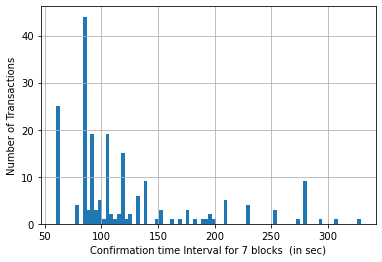

In [19]:
graph7 = result["time_per_7blocks"].hist(bins=80)
graph7.set_xlabel("Confirmation time Interval for 7 blocks  (in sec)")
graph7.set_ylabel("Number of Transactions")

### Calculation for 12 block confirmation times

In [15]:
arr_avg12 = []
for i in range(0,result.shape[0]):
    time = result["time_in_seconds"].iloc[i]
    blocks = result["blockss"].iloc[i]
    arr_avg12.append(12*time/blocks)
result["time_per_12blocks"] = arr_avg12



In [16]:
result["time_per_12blocks"].describe()

count    201.000000
mean     207.112296
std      104.158858
min      102.857143
25%      144.000000
50%      168.000000
75%      228.000000
max      564.000000
Name: time_per_12blocks, dtype: float64

Text(0, 0.5, 'Number of Transactions')

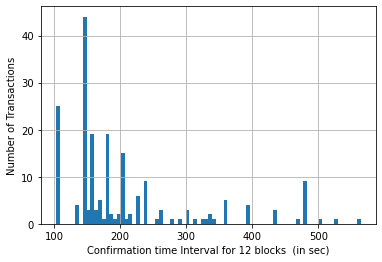

In [18]:
graph12 = result["time_per_12blocks"].hist(bins=80)
graph12.set_xlabel("Confirmation time Interval for 12 blocks  (in sec)")
graph12.set_ylabel("Number of Transactions")